Framingham risk score
====================

https://www.mdcalc.com/framingham-risk-score-hard-coronary-heart-disease#evidence
    
Calculate risk score as baseline for investigation

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [66]:
df = pd.read_csv("framingham.csv")
beta = pd.read_csv("f_score_coeff.csv",index_col="index")
#beta_male = beta["male"]
#beta_female = beta["female"]

print(df.loc[0])
print(beta)

male                 1.00
age                 39.00
education            4.00
currentSmoker        0.00
cigsPerDay           0.00
BPMeds               0.00
prevalentStroke      0.00
prevalentHyp         0.00
diabetes             0.00
totChol            195.00
sysBP              106.00
diaBP               70.00
BMI                 26.97
heartRate           80.00
glucose             77.00
TenYearCHD           0.00
Name: 0, dtype: float64
                           male     female
index                                     
ln_age                52.009610  31.764001
ln_tot_chol           20.014077  22.465206
ln_HDL_chol           -0.905964  -1.187731
ln_sys_bp              1.305784   2.552905
bp_meds                0.241549   0.420251
smoker                12.096316  13.075430
ln_age_x_ln_tot_chol  -4.605038  -5.060998
ln_age_smoker         -2.843670  -2.996945
ln_age_sq             -2.933230   0.000000


In [76]:
def calc_fram_risk(data):
    ''' 
    Return Framlingham risk score as a percentage:
    - Algorythm derived from https://www.mdcalc.com/framingham-risk-score-hard-coronary-heart-disease#evidence
    - n.b assummed values of totChol are in mg/dl
    - Defined HDL_cholesterol based on IDEAL so effect is minimal in calculating risk
    
    "Patients with high risk scores should be counseled aggressively about social factors contributing to their risk
    (smoking, exercise, weight, diet, etc) and also managed with blood pressure and lipid evaluation"
    '''
        
    if data['male'] == 1:
        gender = "male"
        gender_constant = -172.300168
        HDL_chol = 45 #mg/dL
    elif data['male'] == 0:
        gender = "female"
        gender_constant = -146.5933061
        HDL_chol = 55 #mg/dL
    else:
        print("ERROR: gender not detected in calc_fram_risk")
        return -1
            
    L_score = beta[gender].loc["ln_age"] * np.log(data['age']) \
        + beta[gender].loc["ln_tot_chol"] * np.log(data["totChol"]) \
        + beta[gender].loc["ln_HDL_chol"] * np.log(HDL_chol) \
        + beta[gender].loc["ln_sys_bp"] * np.log(data["sysBP"]) \
        + beta[gender].loc["bp_meds"] * data["BPMeds"] \
        + beta[gender].loc["smoker"] * data["currentSmoker"] \
        + beta[gender].loc["ln_age_x_ln_tot_chol"] * np.log(data["age"]) * np.log(data["totChol"]) \
        + beta[gender].loc["ln_age_smoker"] * np.log(data["age"]) * data["currentSmoker"]  \
        + beta[gender].loc["ln_age_sq"] * np.log(data["age"]) * np.log(data["age"]) \
        + gender_constant
    
    if gender == 'male':
        prob = (1 - 0.9402**np.exp(L_score))*100
    elif gender == 'female':
        prob = (1 - 0.98767**np.exp(L_score))*100

    return prob
    
        

In [81]:
test = df.loc[4]
#print(beta['male'].loc["ln_age_sq"])
calc_fram_risk(test)



8.621980167821597

In [97]:
#drop null value rows (for now)
null = df[df.isna().any(axis=1)].index
df_dropped = df.drop(null)


In [107]:
for i, row in df_dropped.iterrows():
    print(i)
    df_dropped['fram_percent'].loc[i] = calc_fram_risk(row)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
15
16
17
18
19
20
22
23
24
25
27
28
29
30
31
32
34
35
37
38
39
40
41
43
44
45
46
47
48
50
51
52
53
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
71
73
74
75
76
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
98
99
100
101
102
103
104
105
106
107
108
109
110
112
113
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
132
133
134
135
136
137
138
140
141
142
143
144
145
146
147
148
149
150
151
152
153
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
185
186
187
188
189
190
191
192
194
195
196
197
198
199
200
201
202
204
205
206
207
208
209
210
212
214
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
248
249
251
252
253
254
255
256
257
258
259
260
261
262
264
265
266
267
268
269
270
271
272
274
275
276
277
278
280
281
283
284
285
286
287
288
289
290
291
292
295
297
298
299
300
303
304
307
308
310
311
312
313
31

2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2175
2176
2178
2179
2180
2182
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2210
2211
2212
2213
2214
2215
2217
2218
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2251
2252
2253
2255
2256
2257
2258
2259
2260
2261
2264
2265
2266
2268
2271
2272
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2342
2343
2344
2345
2347
2348
2349
2350
2351
2352
2353
2354
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2368
2369
2370


4036
4037
4038
4039
4040
4041
4042
4043
4044
4045
4046
4047
4048
4050
4051
4052
4053
4054
4055
4056
4057
4058
4059
4060
4062
4063
4064
4065
4066
4067
4068
4069
4070
4071
4072
4073
4074
4075
4076
4077
4078
4079
4080
4081
4083
4084
4085
4087
4088
4089
4090
4091
4092
4093
4094
4095
4096
4097
4099
4100
4101
4102
4103
4104
4105
4106
4107
4108
4109
4110
4111
4112
4113
4114
4115
4116
4117
4118
4119
4120
4123
4124
4125
4126
4127
4128
4129
4130
4131
4132
4133
4134
4135
4136
4137
4140
4141
4142
4143
4144
4145
4146
4147
4148
4149
4150
4151
4152
4154
4155
4156
4157
4158
4159
4161
4163
4164
4165
4166
4167
4168
4169
4171
4172
4173
4174
4175
4176
4177
4178
4179
4180
4181
4182
4183
4184
4186
4187
4188
4189
4190
4191
4192
4193
4194
4195
4196
4197
4198
4199
4200
4201
4202
4203
4204
4205
4206
4207
4209
4210
4211
4212
4213
4214
4215
4216
4217
4218
4219
4220
4221
4222
4223
4224
4225
4226
4227
4228
4231
4232
4233
4234
4237
4238
4239


In [134]:
#df_dropped.to_csv("fram_risk.csv")
df_dropped = pd.read_csv("fram_risk.csv",index_col="index")

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,fram_percent
index,,,,,,,,,,,,,,,,,
3474.0,1.0,42.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,453.0,158.0,108.0,28.89,90.0,110.0,0.0,66.769562
2206.0,1.0,46.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,405.0,181.5,102.5,26.33,98.0,97.0,1.0,59.634246
543.0,1.0,47.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,439.0,145.0,74.0,22.42,100.0,90.0,1.0,54.889192
3844.0,0.0,62.0,3.0,1.0,0.0,1.0,0.0,1.0,1.0,358.0,215.0,110.0,37.62,110.0,368.0,1.0,52.540569
590.0,0.0,60.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,294.0,220.0,118.0,24.22,90.0,59.0,0.0,43.965060


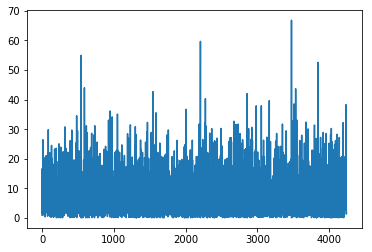

In [135]:
plt.plot(df_dropped['fram_percent'])
df_dropped.sort_values('fram_percent',ascending=False).head() #look at highest risk percentages

In [136]:
def risk_bool(row,percent):
    return (row['fram_percent'] > percent)

percentages = np.linspace(5,80,51)
print(percentages)
for i in percentages:
    df_dropped['{}_percent'.format(i)] = df_dropped.apply(risk_bool, axis=1,args=(i,))
#df_dropped['10_percent'] = df_dropped.apply(risk_bool10, axis=1,args=(10,))
#df_dropped['20_percent'] = df_dropped.apply(risk_bool10, axis=1,args=(20,))



[ 5.   6.5  8.   9.5 11.  12.5 14.  15.5 17.  18.5 20.  21.5 23.  24.5
 26.  27.5 29.  30.5 32.  33.5 35.  36.5 38.  39.5 41.  42.5 44.  45.5
 47.  48.5 50.  51.5 53.  54.5 56.  57.5 59.  60.5 62.  63.5 65.  66.5
 68.  69.5 71.  72.5 74.  75.5 77.  78.5 80. ]


In [137]:
df_dropped.columns


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'fram_percent',
       '5.0_percent', '6.5_percent', '8.0_percent', '9.5_percent',
       '11.0_percent', '12.5_percent', '14.0_percent', '15.5_percent',
       '17.0_percent', '18.5_percent', '20.0_percent', '21.5_percent',
       '23.0_percent', '24.5_percent', '26.0_percent', '27.5_percent',
       '29.0_percent', '30.5_percent', '32.0_percent', '33.5_percent',
       '35.0_percent', '36.5_percent', '38.0_percent', '39.5_percent',
       '41.0_percent', '42.5_percent', '44.0_percent', '45.5_percent',
       '47.0_percent', '48.5_percent', '50.0_percent', '51.5_percent',
       '53.0_percent', '54.5_percent', '56.0_percent', '57.5_percent',
       '59.0_percent', '60.5_percent', '62.0_percent', '63.5_percent',
       '65.0_percent', '66.5_percent', '68.0_percent', '69.5_percen

In [138]:
def validate(row,percent):
    return float(row['TenYearCHD'] == row['{}_percent'.format(percent)])

for i in percentages:
    df_dropped['{}_CHD'.format(i)] = df_dropped.apply(validate, axis=1,args=(i,))




In [139]:
print(df_dropped.loc[3])

male                     0
age                     61
education                3
currentSmoker            1
cigsPerDay              30
BPMeds                   0
prevalentStroke          0
prevalentHyp             1
diabetes                 0
totChol                225
sysBP                  150
diaBP                   95
BMI                  28.58
heartRate               65
glucose                103
TenYearCHD               1
fram_percent       8.77154
5.0_percent           True
6.5_percent           True
8.0_percent           True
9.5_percent          False
11.0_percent         False
12.5_percent         False
14.0_percent         False
15.5_percent         False
17.0_percent         False
18.5_percent         False
20.0_percent         False
21.5_percent         False
23.0_percent         False
                    ...   
36.5_CHD                 0
38.0_CHD                 0
39.5_CHD                 0
41.0_CHD                 0
42.5_CHD                 0
44.0_CHD                 0
4

In [147]:
acc = []
per = []
for i in percentages:
    score = 100* sum(df_dropped['{}_CHD'.format(i)])/len(df_dropped['{}_CHD'.format(i)])
    print("Accuracy for {}% cuttoff: ".format(i), score)
    acc.append(score)
    per.append(i)
    

Accuracy for 5.0% cuttoff:  54.90571194315387
Accuracy for 6.5% cuttoff:  60.317026509975406
Accuracy for 8.0% cuttoff:  65.04509428805684
Accuracy for 9.5% cuttoff:  68.51598797485651
Accuracy for 11.0% cuttoff:  71.22164525826729
Accuracy for 12.5% cuttoff:  74.17327138562449
Accuracy for 14.0% cuttoff:  76.11369226564635
Accuracy for 15.5% cuttoff:  77.72615468707298
Accuracy for 17.0% cuttoff:  79.52992620934681
Accuracy for 18.5% cuttoff:  80.97840940147582
Accuracy for 20.0% cuttoff:  81.93495490571195
Accuracy for 21.5% cuttoff:  83.0828095107953
Accuracy for 23.0% cuttoff:  83.8207160426346
Accuracy for 24.5% cuttoff:  84.20333424432906
Accuracy for 26.0% cuttoff:  84.47663295982508
Accuracy for 27.5% cuttoff:  84.53129270292429
Accuracy for 29.0% cuttoff:  84.66794206067232
Accuracy for 30.5% cuttoff:  84.80459141842033
Accuracy for 32.0% cuttoff:  84.85925116151954
Accuracy for 33.5% cuttoff:  84.74993167532112
Accuracy for 35.0% cuttoff:  84.69527193222191
Accuracy for 36.5%

Text(0, 0.5, '% accuracy')

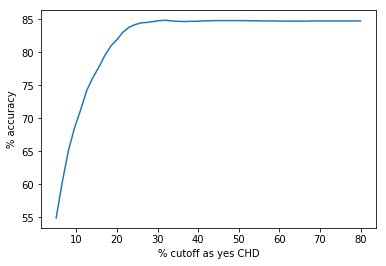

In [150]:
#THIS GRAPH IS EXTREMELY DESCEPTIVE i.e at 80% cutoff the algorythm presicts yes_CHD 0 times and no_CHD every time. 
# However for the data set the no_CHD/yes_CHD = 84.75% and so the model is '84.75%' accurate strictly.

plt.plot(per,acc)
plt.xlabel("% cutoff as yes CHD")
plt.ylabel("% accuracy")